In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load the datasets
trader_data = pd.read_csv('trader_data.csv')
sentiment_data = pd.read_csv('sentiment_data.csv')

# Display basic information
print("Trader Data Shape:", trader_data.shape)
print("Sentiment Data Shape:", sentiment_data.shape)
print("\nTrader Data Columns:")
print(trader_data.columns.tolist())
print("\nSentiment Data Columns:")
print(sentiment_data.columns.tolist())


Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)

Trader Data Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Sentiment Data Columns:
['timestamp', 'value', 'classification', 'date']


In [9]:
# Check first few rows
print("=== TRADER DATA ===")
print(trader_data.head())
print("\n=== SENTIMENT DATA ===")
print(sentiment_data.head())


=== TRADER DATA ===
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0  

In [10]:
# Check for missing values
print("Missing values in trader data:")
print(trader_data.isnull().sum())
print("\nMissing values in sentiment data:")
print(sentiment_data.isnull().sum())


Missing values in trader data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in sentiment data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [13]:
# Import pandas first
import pandas as pd

# Convert date columns to datetime
# Option 2: Specify the exact format string matching your data
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], dayfirst=True, errors='coerce')

# Create date column for merging (remove time from trader data)
trader_data['date'] = trader_data['Timestamp IST'].dt.date
sentiment_data['date'] = sentiment_data['date'].dt.date


In [15]:
# Merge datasets on date
merged_data = trader_data.merge(sentiment_data[['date', 'classification']], 
                               on='date', how='left')

print("Merged data shape:", merged_data.shape)
print("Sample merged data:")
print(merged_data[['Timestamp IST', 'Closed PnL', 'classification']].head())


Merged data shape: (211224, 18)
Sample merged data:
        Timestamp IST  Closed PnL classification
0 2024-12-02 22:50:00         0.0          Greed
1 2024-12-02 22:50:00         0.0          Greed
2 2024-12-02 22:50:00         0.0          Greed
3 2024-12-02 22:50:00         0.0          Greed
4 2024-12-02 22:50:00         0.0          Greed


In [17]:
# Analyze performance by sentiment
performance_by_sentiment = merged_data.groupby('classification')['Closed PnL'].agg([
    'mean', 'median', 'sum', 'count'
]).round(2)

print("Performance by Market Sentiment:")
print(performance_by_sentiment)


Performance by Market Sentiment:
                  mean  median         sum  count
classification                                   
Extreme Fear      1.89    0.00     4399.94   2326
Extreme Greed   205.82    0.96  1156893.68   5621
Fear            128.29    0.00  1779225.58  13869
Greed            53.99    0.00   609632.53  11292
Neutral          27.09    0.00    74656.74   2756


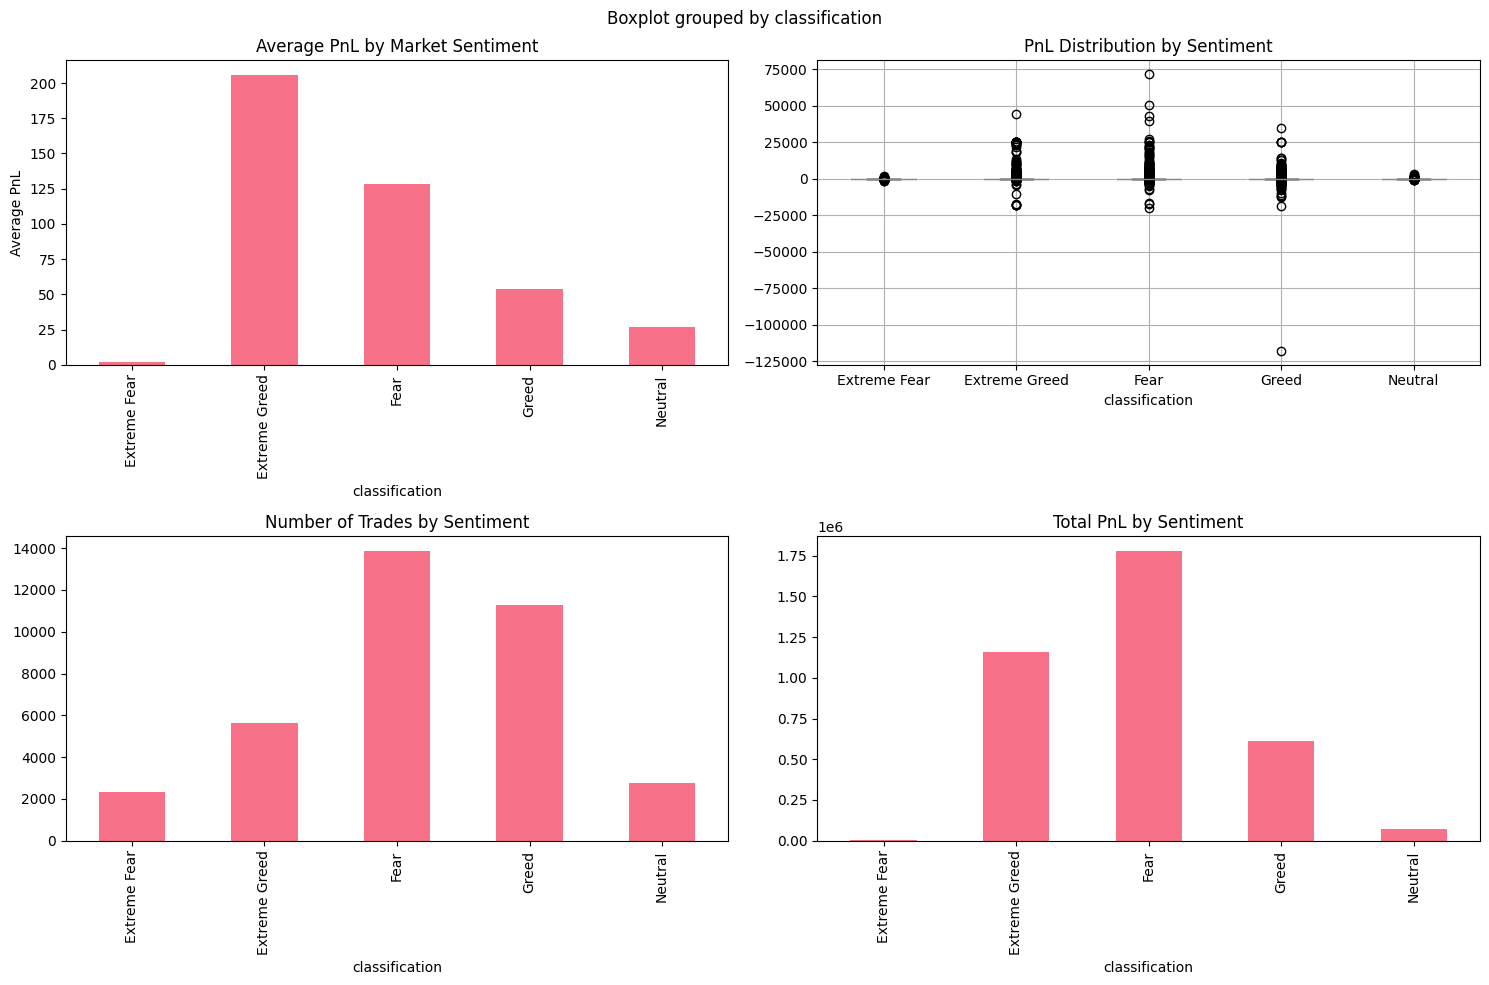

In [19]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average PnL by sentiment
performance_by_sentiment['mean'].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average PnL by Market Sentiment')
axes[0,0].set_ylabel('Average PnL')

# Plot 2: PnL distribution
merged_data.boxplot(column='Closed PnL', by='classification', ax=axes[0,1])
axes[0,1].set_title('PnL Distribution by Sentiment')

# Plot 3: Number of trades
performance_by_sentiment['count'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Number of Trades by Sentiment')

# Plot 4: Total PnL
performance_by_sentiment['sum'].plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Total PnL by Sentiment')

plt.tight_layout()
plt.show()
